Sujet Choisi : https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

# But du modèle : apprendre a identifier la nature d'un astre avec 6 paramètres Système photométrique

Import des librairies necessaires

In [2]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


**Entrées du dataset :**
1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

**Entrées à garder :**
1. u = Ultraviolet filter in the photometric system
2. g = Green filter in the photometric system
3. r = Red filter in the photometric system
4. i = Near Infrared filter in the photometric system
5. z = Infrared filter in the photometric system
7. class = object class (galaxy, star or quasar object)
6. redshift = redshift value based on the increase in wavelength


In [4]:
uploadedFiles = files.upload()

Saving star_classification.csv to star_classification.csv


In [23]:
csvfile = uploadedFiles['star_classification.csv'].decode('utf-8').splitlines()

#On prend uniquement 5000 ligne pour le moment
data = list(csv.reader(csvfile))[:5000]

for row in data[1:]:
    print(f"[{row[0]}, {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}] = {row[6]}")

[23.87882, 22.2753, 20.39501, 19.16573, 18.79371, 0.6347936] = GALAXY
[24.77759, 22.83188, 22.58444, 21.16812, 21.61427, 0.779136] = GALAXY
[25.26307, 22.66389, 20.60976, 19.34857, 18.94827, 0.6441945] = GALAXY
[22.13682, 23.77656, 21.61162, 20.50454, 19.2501, 0.9323456] = GALAXY
[19.43718, 17.58028, 16.49747, 15.97711, 15.54461, 0.1161227] = GALAXY
[23.48827, 23.33776, 21.32195, 20.25615, 19.54544, 1.424659] = QSO
[21.46973, 21.17624, 20.92829, 20.60826, 20.42573, 0.5864546] = QSO
[22.24979, 22.02172, 20.34126, 19.48794, 18.84999, 0.477009] = GALAXY
[24.40286, 22.35669, 20.61032, 19.4649, 18.95852, 0.660012] = GALAXY
[21.74669, 20.03493, 19.17553, 18.81823, 18.65422, -7.90E-06] = STAR
[25.77163, 22.52042, 20.63884, 19.78071, 19.05765, 0.4595958] = GALAXY
[23.76761, 23.79969, 20.98318, 19.80745, 19.45579, 0.5914091] = GALAXY
[23.17274, 20.14496, 19.41948, 19.22034, 18.89359, 7.18E-05] = STAR
[20.8294, 18.75091, 17.51118, 17.01631, 16.62772, 0.1521936] = GALAXY
[23.20911, 22.79291, 22.0

On converti le type de l'objet stellaire en numéro pour le modèle :

In [24]:
class_mapping = {"GALAXY": 0, "QSO": 1, "STAR": 2}

for row in data[1:]:
    row[6] = class_mapping[row[6]]


for row in data[1:]:
    print(f"[{row[0]}, {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}] = {row[6]}")

[23.87882, 22.2753, 20.39501, 19.16573, 18.79371, 0.6347936] = 0
[24.77759, 22.83188, 22.58444, 21.16812, 21.61427, 0.779136] = 0
[25.26307, 22.66389, 20.60976, 19.34857, 18.94827, 0.6441945] = 0
[22.13682, 23.77656, 21.61162, 20.50454, 19.2501, 0.9323456] = 0
[19.43718, 17.58028, 16.49747, 15.97711, 15.54461, 0.1161227] = 0
[23.48827, 23.33776, 21.32195, 20.25615, 19.54544, 1.424659] = 1
[21.46973, 21.17624, 20.92829, 20.60826, 20.42573, 0.5864546] = 1
[22.24979, 22.02172, 20.34126, 19.48794, 18.84999, 0.477009] = 0
[24.40286, 22.35669, 20.61032, 19.4649, 18.95852, 0.660012] = 0
[21.74669, 20.03493, 19.17553, 18.81823, 18.65422, -7.90E-06] = 2
[25.77163, 22.52042, 20.63884, 19.78071, 19.05765, 0.4595958] = 0
[23.76761, 23.79969, 20.98318, 19.80745, 19.45579, 0.5914091] = 0
[23.17274, 20.14496, 19.41948, 19.22034, 18.89359, 7.18E-05] = 2
[20.8294, 18.75091, 17.51118, 17.01631, 16.62772, 0.1521936] = 0
[23.20911, 22.79291, 22.08589, 21.86282, 21.8512, 0.8181597] = 0
[24.8868, 22.13311, 

Préparation des datas pour la construction du modèle

In [25]:
# Séparation des caractéristiques et de la classe d'objet
data = np.array(data[1:], dtype=float)
X = data[:, :-1]  # Caractéristque de l'objet celeste
y = to_categorical(data[:, -1])  # classe de l'objet


#Normalisation des datas entre 0 et 1 :

X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
print(X)



[[6.85876335e-01 6.39627639e-01 5.95922336e-01 5.83320912e-01
  5.67125117e-01 9.10882986e-02]
 [7.38943035e-01 6.69890022e-01 7.22270473e-01 7.31809435e-01
  7.53816654e-01 1.11666312e-01]
 [7.67607567e-01 6.60756065e-01 6.08315179e-01 5.96879530e-01
  5.77355371e-01 9.24285275e-02]
 ...
 [2.97878383e-01 3.07182925e-01 3.42036697e-01 3.46126665e-01
  3.81245727e-01 5.93461814e-04]
 [6.45562483e-01 6.79292033e-01 6.10916666e-01 6.13544529e-01
  5.97786093e-01 7.55548226e-02]
 [4.30824114e-01 4.34915867e-01 4.49073927e-01 4.57437255e-01
  4.66284047e-01 2.64650152e-02]]


In [36]:
# 1. Define the model
model = Sequential()
model.add(Dense(32, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 2. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# 3. Train the model and store training history
history = model.fit(X, y, epochs=100, validation_split=0.2)

# 4. Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                224       
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1379 (5.39 KB)
Trainable params: 1379 (5.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 0.9149 - accuracy: 0.6129 - val_loss: 0.9519 - val_accuracy: 0.5120
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.7409 - accuracy: 0.6834 - val_loss: 0.7226 - val_accuracy: 0.6460

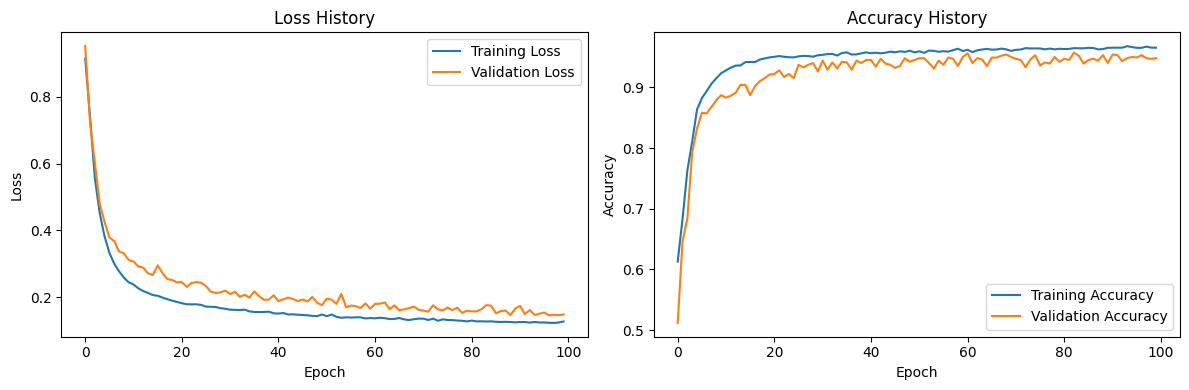

In [37]:
# Plot training & validation history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()